In [1]:
#loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data

In [2]:
money = pd.read_csv("~\Downloads\mobile_money.csv")
money.head()

,hhid,cellphone,wealth,size,education_years,education_other,bank_acct,mattress,sacco,merry,...,d1,d2,d3,d4,d5,FALSE,lmean_recddist,ldistance,urban,mweight
0,1649034,1.0,202600.0,1.0,3.0,0.0,no,no,no,no,...,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,1,4.305487
1,1649056,0.0,13300.0,5.0,8.0,0.0,no,yes,no,yes,...,0.4,0.2,0.2,0.2,0.0,NaN,NaN,NaN,1,4.006307
2,1649063,1.0,149700.0,5.0,0.0,1.0,no,no,yes,yes,...,0.6,0.0,0.2,0.2,0.0,NaN,NaN,NaN,1,3.904419
3,1649041,1.0,20000.0,5.0,12.0,0.0,no,yes,no,no,...,0.4,0.2,0.2,0.2,0.0,NaN,5.913503,5.372935,1,4.054456
4,1649012,1.0,31000.0,5.0,0.0,0.0,yes,yes,no,no,...,0.0,0.0,0.2,0.4,0.2,1.0,NaN,NaN,1,3.706399


In [3]:
print(money['mpesa_user'].describe(include='all'))
print(money['mpesa_user'].value_counts(normalize=True))

count     2282
unique       2
top        yes
freq      1676
Name: mpesa_user, dtype: object
yes    0.734443
no     0.265557
Name: mpesa_user, dtype: float64


**We can see that 1676 people in the data are M-pesa users, which equates to 73.44% of the data.**

In [4]:
#seperating categorical and numeric variables
a = ['totexppc', 'wkexppc', 'wealth', 'size', 'education_years']
b = ['cellphone', 'neg', 'pos', 'ag', 'sick', 'bank_acct', 'mattress', 'sendd', 'recdd', 
      'sacco', 'merry', 'occ_farmer', 'occ_public', 'occ_prof', 'occ_help', 
      'occ_bus', 'occ_sales', 'occ_ind', 'occ_other', 'occ_ue'] 

In [5]:
money = money.dropna(subset=['totexppc', 'wkexppc', 'wealth', 'size', 'education_years',
                     'cellphone', 'neg', 'pos', 'ag', 'sick', 'bank_acct', 'mattress', 'sendd', 'recdd', 
                     'sacco', 'merry', 'occ_farmer', 'occ_public', 'occ_prof', 'occ_help', 
                     'occ_bus', 'occ_sales', 'occ_ind', 'occ_other', 'occ_ue'])

In [6]:
#checking for NA values
money_check = money.isna()
check = money_check[['totexppc', 'wkexppc', 'wealth', 'size', 'education_years',
                     'cellphone', 'neg', 'pos', 'ag', 'sick', 'bank_acct', 'mattress', 'sendd', 'recdd', 
                     'sacco', 'merry', 'occ_farmer', 'occ_public', 'occ_prof', 'occ_help', 
                     'occ_bus', 'occ_sales', 'occ_ind', 'occ_other', 'occ_ue']].any(True)
check.unique()

array([False])

In [7]:
c = []
i = 0
for i in range(len(b)):
    if money[b[i]].dtypes != 'int64':
        c.append(b[i])
        i=i+1
    else:
        i=i+1
c

['cellphone', 'bank_acct', 'mattress', 'sacco', 'merry']

In [8]:
money['cellphone'] = money['cellphone'].astype(int)

In [9]:
money['bank_acct'] = money['bank_acct'].map({'yes': 1, 'no': 0, '0': 0})
money['mattress'] = money['mattress'].map({'yes': 1, 'no': 0, '0': 0})
money['sacco'] = money['sacco'].map({'yes': 1, 'no': 0, '0': 0})
money['merry'] = money['merry'].map({'yes': 1, 'no': 0, '0': 0})

In [10]:
mpesa = money.groupby('mpesa_user')

In [11]:
a = ['totexppc', 'wkexppc', 'wealth', 'size', 'education_years']
      
b = ['cellphone', 'neg', 'pos', 'ag', 'sick', 'bank_acct', 'mattress', 'sendd', 'recdd', 
      'sacco', 'merry', 'occ_farmer', 'occ_public', 'occ_prof', 'occ_help', 
      'occ_bus', 'occ_sales', 'occ_ind', 'occ_other', 'occ_ue']

In [12]:
des = mpesa[a].describe()
des = des.astype(int)

In [13]:
des.T

mpesa_user                  no       yes
totexppc        count      594      1667
                mean     54237     84476
                std      93427    102949
                min        480      2306
                25%      18554     34411
                50%      31136     57204
                75%      53756     98570
                max    1576484   1870776
wkexppc         count      594      1667
                mean     28578     35493
                std      28099     27961
                min          0      1397
                25%      13000     18412
                50%      20297     27726
                75%      32844     42734
                max     237484    263380
wealth          count      594      1667
                mean     76478    214923
                std     297089   1460980
                min          0         0
                25%       7062     24950
                50%      20250     54000
                75%      50225    112600
                max    4753200  47200000
size            count      594      1667
                mean         4         4
                std          2         2
                min          1         1
                25%          2         3
                50%          4         4
                75%          6         6
                max         12        13
education_years count      594      1667
                mean         6         8
                std          4         5
                min          0         0
                25%          2         5
                50%          7         9
                75%         10        12
                max         19        19

**The table above shows that average and median M-pesa users, were wealthier, and had higher consumption levels. The median M-pesa user is wealthier and consumes more than 75% of non M-pesa users. There are no observable differences in household size, but the average and media M-pesa user appears to be more educated than than the same non M-pesa user.**

In [14]:
count = mpesa[b].count().T
avg = mpesa[b].mean().T

In [15]:
pd.concat([count, avg], axis=1)

mpesa_user,no,yes,no,yes
cellphone,594,1667,0.427609,0.922615
neg,594,1667,0.540404,0.529694
pos,594,1667,0.048822,0.072585
ag,594,1667,0.139731,0.108578
sick,594,1667,0.378788,0.389922
bank_acct,594,1667,0.272727,0.712657
mattress,594,1667,0.835017,0.686863
sendd,594,1667,0.198653,0.615477
recdd,594,1667,0.173401,0.518296
sacco,594,1667,0.112795,0.226755


**Having a cellphone and bank account are important variables to possess to be an M-pesa user. Most users had both, whereas only 43% of non-users have a cellhone, and 27% having a bank account. Shocks in terms of weather, ilness, any type of positive or negative were relatively similar. Another important variable is the need to send and recieve remittances, with considerably higher propotions of M-pesa users requiring the service as compared to non-users. The proportion of farmers and businesspersons in the data that are not M-pesa users are higher, but do have a significant portion of M-pesa users. Additionally, public, professional and help are the occupations which have greater proportions of M-pesa users.**

In [16]:
data = money[['totexppc', 'wkexppc', 'wealth', 'size', 'education_years',
             'cellphone', 'neg', 'pos', 'ag', 'sick', 'bank_acct', 'mattress', 
             'sendd', 'recdd', 'sacco', 'merry', 'occ_farmer', 'occ_public', 
             'occ_prof', 'occ_help', 'occ_bus', 'occ_sales', 'occ_ind', 'occ_other', 
             'occ_ue', 'mpesa_user']]

In [17]:
data.head()

,totexppc,wkexppc,wealth,size,education_years,cellphone,neg,pos,ag,sick,...,occ_farmer,occ_public,occ_prof,occ_help,occ_bus,occ_sales,occ_ind,occ_other,occ_ue,mpesa_user
0,150808.0,68640.0,202600.0,1.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,yes
1,33866.4,15246.4,13300.0,5.0,8.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,no
2,36072.8,15194.4,149700.0,5.0,0.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,yes
3,21632.0,9412.0,20000.0,5.0,12.0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,yes
4,29848.0,15236.0,31000.0,5.0,0.0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,yes


In [18]:
data['mpesa_user'].unique()

array(['yes', 'no'], dtype=object)

In [19]:
data['mpesa_user'] = data['mpesa_user'].map({'yes': 1, 'no': 0})

C:\Users\Vivaan\AppData\Local\Temp\ipykernel_16080\2131749002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mpesa_user'] = data['mpesa_user'].map({'yes': 1, 'no': 0})


In [20]:
data['mpesa_user'].unique()

array([1, 0], dtype=int64)

In [21]:
dep = ['totexppc', 'wkexppc', 'wealth', 'size', 'education_years','cellphone', 'neg', 
       'pos', 'ag', 'sick', 'bank_acct', 'mattress', 'sendd', 'recdd', 'sacco', 'merry', 
       'occ_farmer', 'occ_public', 'occ_prof', 'occ_help', 'occ_bus', 'occ_sales', 'occ_ind', 
       'occ_other', 'occ_ue']

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[dep], data['mpesa_user'], test_size=0.2)

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

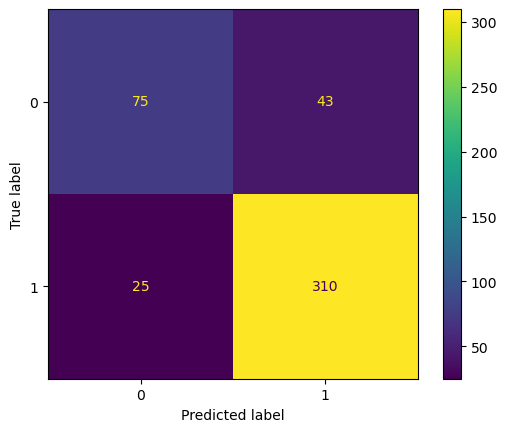

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

scores = []
false_pos = []
recall = []

logit = LogisticRegression()
logit.fit(x_train_scaled, y_train)
l_score = logit.score(x_test_scaled, y_test)
scores.append(l_score)
y_pred=logit.predict(x_test_scaled)
cm = confusion_matrix(y_test, logit.predict(x_test_scaled))
disp = ConfusionMatrixDisplay(cm, display_labels=None)
disp.plot()
plt.show()

In [24]:
false_pos_rate = cm[0,1]/cm[0].sum()
false_pos.append(false_pos_rate)

recall_rate = cm[1,1]/cm[1].sum()
recall.append(recall_rate)


In [25]:
print(scores)
print(false_pos)
print(recall)

[0.8498896247240618]
[0.3644067796610169]
[0.9253731343283582]


In [26]:
logit_features = pd.Series(logit.coef_.tolist()[0], index = list(data[dep]))
sorted_logit_features = logit_features.sort_values(ascending = False, key = abs)
sorted_logit_features[0:5]

cellphone    0.867611
recdd        0.653522
sendd        0.556161
bank_acct    0.441500
mattress    -0.358128
dtype: float64

In [27]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

print("Precision:",metrics.precision_score(y_test, y_pred)) 

print("Recall:",metrics.recall_score(y_test, y_pred)) 

Accuracy: 0.8498896247240618
Precision: 0.8781869688385269
Recall: 0.9253731343283582


In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

0.8741209208196307

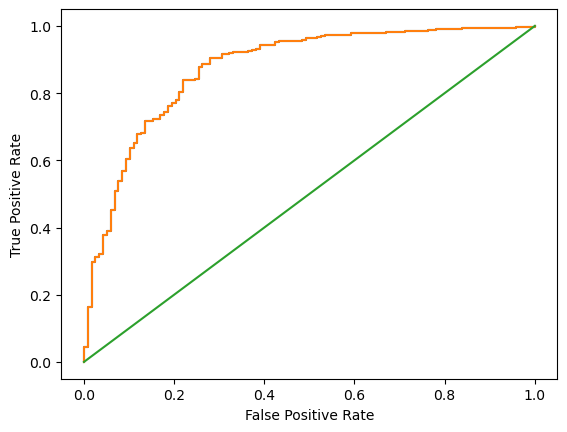

In [29]:
predictions = logit.predict_proba(x_test_scaled)
predictions
predictions[:,1]

fpr,tpr,threshold = roc_curve(y_test, predictions[:,1])

plt.plot(fpr,tpr)
plt.plot(fpr,tpr, fpr, fpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

auc_l = roc_auc_score(y_test, predictions[:,1])
auc_l

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train_scaled, y_train)
tree_score = tree.score(x_test_scaled, y_test)
tree_score

0.7505518763796909

0.6831267391854288

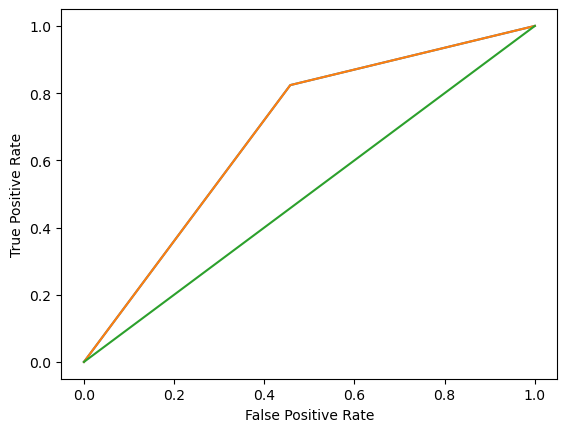

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
predictions = tree.predict_proba(x_test_scaled)
predictions
predictions[:,1]

fpr,tpr,threshold = roc_curve(y_test, predictions[:,1])

plt.plot(fpr,tpr)

plt.plot(fpr,tpr, fpr, fpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

auc_t = roc_auc_score(y_test, predictions[:,1])
auc_t

In [32]:
tree_features = pd.Series(tree.feature_importances_.tolist(), index = list(data[dep]))
sorted_tree_features = tree_features.sort_values(ascending = False, key = abs)
sorted_tree_features[0:5]

cellphone    0.277711
totexppc     0.125588
wealth       0.120821
wkexppc      0.097729
size         0.070028
dtype: float64

In [33]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
forest.fit(x_train_scaled, y_train)
forest_score = forest.score(x_test_scaled, y_test)
forest_score

0.8565121412803532

0.8695041740450291

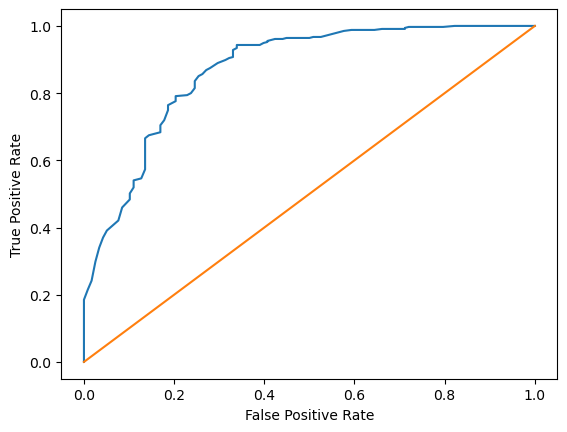

In [34]:
predictions = forest.predict_proba(x_test_scaled)
# Plotting the ROC curve:
fpr,tpr,threshold = roc_curve(y_test, predictions[:,1])
plt.plot(fpr,tpr, fpr, fpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

auc_f = roc_auc_score(y_test, predictions[:,1])
auc_f

In [35]:
forest_features = pd.Series(forest.feature_importances_.tolist(), index = list(data[dep]))
sorted_forest_features = forest_features.sort_values(ascending = False, key = abs)
sorted_forest_features[0:5]

cellphone    0.161641
wealth       0.130038
totexppc     0.124071
wkexppc      0.104477
size         0.065826
dtype: float64

**Comparing Accuracy of the measures**

In [36]:
print(l_score)
print(tree_score)
print(forest_score)

0.8498896247240618
0.7505518763796909
0.8565121412803532


Accuracy measure to portion of oberservations that are classified correctly by the model. As per this measure, it seems that logistic regressions works best, however, random forest is very close. 

**Comparing AUC**

In [37]:
print(auc_l)
print(auc_t)
print(auc_f)

0.8741209208196307
0.6831267391854288
0.8695041740450291


AUC measures the ability of the classifier to successfully distinguish between the two classes, in this case, users and non-users. Again, logistic regression has a higher AUC with forest having a near similar measure. This implies that logistic regression is the best model (per the two criteria), and the random forest model can be considered as good. 

**Top 3 Predictors**

In [38]:
sorted_logit_features[0:5]

cellphone    0.867611
recdd        0.653522
sendd        0.556161
bank_acct    0.441500
mattress    -0.358128
dtype: float64

In [39]:
sorted_forest_features[0:5]

cellphone    0.161641
wealth       0.130038
totexppc     0.124071
wkexppc      0.104477
size         0.065826
dtype: float64

The logistic regression uses Cellphone, and whether or not the individual sends remittances or not as its top3 predictors. This makes sense as the app is most accessible to people who have a cellphone and require to transfer or recieve money. 

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

dataframe_scaled = scaler.transform(data[dep])

In [46]:
dic = {}
for k in range(1, 11):
    KNN=KNeighborsClassifier(n_neighbors = k)
    KNN.fit(x_test_scaled, y_test)
    
    cross_val_scores = cross_val_score(KNN, dataframe_scaled, data["mpesa_user"])
    cross_val_mean = cross_val_scores.mean()
    dic[k] = cross_val_mean

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [42]:
cross_val_means = pd.Series(dic, index = list(range(1,11)))
sorted_cross_val_means = cross_val_means.sort_values(ascending = False)

In [43]:
from sklearn.model_selection import GridSearchCV

n_neigh_dic={"n_neighbors":np.arange(1, 11)}

GS = GridSearchCV(KNeighborsClassifier(), n_neigh_dic)
GS.fit(dataframe_scaled, data["mpesa_user"])
GS.best_params_



{'n_neighbors': 9}

**Optimal K = 9**

In [44]:
# Now to assess the accuracy of the classifier by building it:
KNN = KNeighborsClassifier(n_neighbors = GS.best_params_["n_neighbors"])
KNN.fit(x_train_scaled, y_train)
score = KNN.score(x_test_scaled, y_test)
score

0.82560706401766

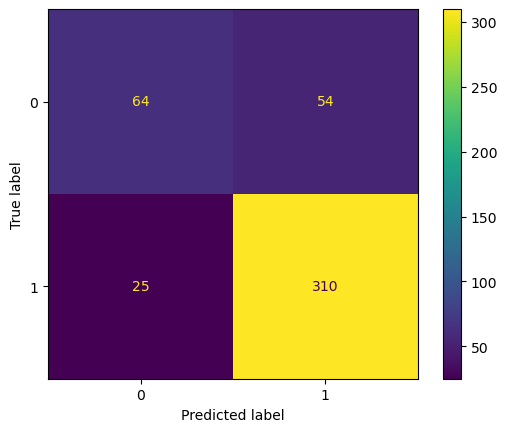

0.8091449532001012

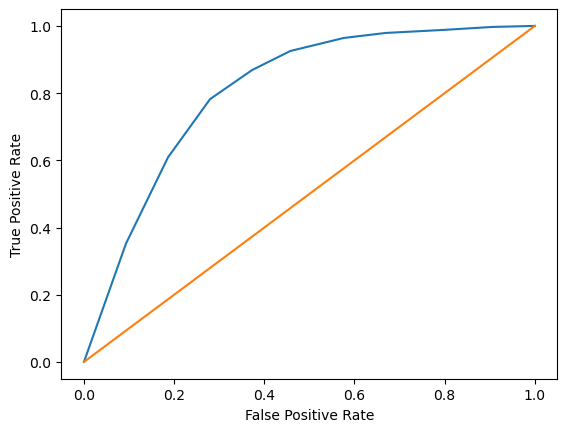

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, KNN.predict(x_test_scaled))
disp = ConfusionMatrixDisplay(cm, display_labels = None)
disp.plot()
plt.show()


predictions = KNN.predict_proba(x_test_scaled)
# Plotting the ROC curve:
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,threshold = roc_curve(y_test, predictions[:,1])
plt.plot(fpr,tpr, fpr, fpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

auc = roc_auc_score(y_test, predictions[:,1])
auc


**The optimal KNN classifiers outpersoms the Decision Tree model but does not outperform both the logistic and random forest models. Hence, logistic regression is still the best model**

## Conclusion

To increase use of M-pesa users:
- Increase cell phone production and make it more accessible.
- Improve bank facilities and ease to open an account.
- Increase in consumption is also a criteria, which is a more systemic factor. 
- Market the benfits to individuals who are farmers, businesspersons, or work in the public sector. 